### Checking Kovner's approximation for four Wilson line correlators in momentum space 

$$ \langle U_{ab} (k) U_{cd} (p) \rangle = \frac{(2\pi)^2 \delta^{(2)}(k+p) D(k) }{N_c^2-1} \delta_{ac} \delta_{bd} $$

The following combinations 

* A
* B
* C

In [220]:
# Import our functions
import cgc

# Import numpy and matplotlib for plotting/other utility
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Make our plots nice and large
plt.rcParams["figure.dpi"] = 120
plt.rcParams["font.size"] = 12

In [221]:
M = 50 #Number of configurations  
N = 256  
L = 32 # S_\perp = L^2 is the area of the target
delta = L/N 
mu = 1 # defines the units in the calculation 

# Collecting and storing configurations; here the fundamental Wilson line in x space are stored
# This step may take about 20-30 minutes 
U_list=[]
for m in range(M):
    print('Configuration #', m , ' ', '.'*10)
    nucleus = cgc.Nucleus(3, N, delta,  mu,  M=0.1, Ny=100)
    U=nucleus.adjointWilsonLine(verbose=1)
    U_list.append(U) 
    print('Configuration #', m , ' ', '.'*10, ' finished!') 

Configuration # 0   ..........
Generating Nucleus color charge field..........finished!
Calculating Nucleus gauge field..........finished!
Calculating Nucleus wilson line..........finished!
Calculating Nucleus adjoint wilson line..........finished!
Configuration # 0   ..........  finished!
Configuration # 1   ..........
Generating Nucleus color charge field..........finished!
Calculating Nucleus gauge field..........finished!
Calculating Nucleus wilson line..........finished!
Calculating Nucleus adjoint wilson line..........finished!
Configuration # 1   ..........  finished!
Configuration # 2   ..........
Generating Nucleus color charge field..........finished!
Calculating Nucleus gauge field..........finished!
Calculating Nucleus wilson line..........finished!
Calculating Nucleus adjoint wilson line..........finished!
Configuration # 2   ..........  finished!
Configuration # 3   ..........
Generating Nucleus color charge field..........finished!
Calculating Nucleus gauge field........

In [222]:
#Adjoint Wilson line in the momentum space
import scipy
U_fft = np.zeros((8, 8, N, N, M), dtype='complex')

delta2 = delta**2
m=0
for U in U_list:
    print('Configuration #', m , ' ', '.'*10)
    U_fft[:,:,:,:,m] = delta2*scipy.fft.fft2(U,axes=(2,3),workers=-1)
    print('Configuration #', m , ' ', '.'*10, ' finished!') 
    m=m+1

Configuration # 0   ..........
Configuration # 0   ..........  finished!
Configuration # 1   ..........
Configuration # 1   ..........  finished!
Configuration # 2   ..........
Configuration # 2   ..........  finished!
Configuration # 3   ..........
Configuration # 3   ..........  finished!
Configuration # 4   ..........
Configuration # 4   ..........  finished!
Configuration # 5   ..........
Configuration # 5   ..........  finished!
Configuration # 6   ..........
Configuration # 6   ..........  finished!
Configuration # 7   ..........
Configuration # 7   ..........  finished!
Configuration # 8   ..........
Configuration # 8   ..........  finished!
Configuration # 9   ..........
Configuration # 9   ..........  finished!
Configuration # 10   ..........
Configuration # 10   ..........  finished!
Configuration # 11   ..........
Configuration # 11   ..........  finished!
Configuration # 12   ..........
Configuration # 12   ..........  finished!
Configuration # 13   ..........
Configuration

### A. Dipole combination 

$$ \langle tr [ U^+(k_1) U(k_1) ]  tr [ U^+(k_2) U(k_2) ] \rangle  
\approx 
(N_c^2-1)^2 S^2_\perp D(k_1) D(k_2)
+ (2\pi)^2 \delta(k_1-k_2) S_\perp D^2(k_1) + (2\pi)^2 \delta(k_1+k_2) S_\perp D^2(k_1)
$$
Here the leading contribution is proportional to $S_\perp^2$ and to the fourth power of $N_c$. This contribution appears in the two-gluon production of the dilute-dense approximation. It yields the uncorrelated production. 

Input momentum:                       -7.215046179364441 7.575023796619709
Approximate momentum on the lattice:  -7.19378127447371 7.542347789215962


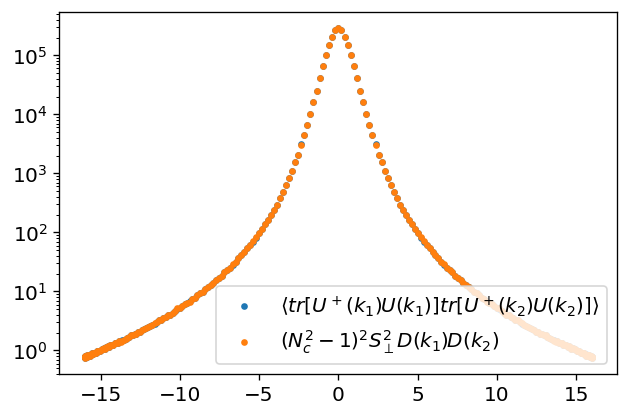

In [223]:
from random import uniform 
k2x = uniform(-1/delta, 1/delta)
k2y = uniform(-1/delta, 1/delta)

i_k2 = int(N*np.arcsin(abs(k2x)/2.0*delta)/np.pi + 0.5)
j_k2 = int(N*np.arcsin(abs(k2y)/2.0*delta)/np.pi + 0.5)

if(k2x<0): 
    i_k2 = N-i_k2
    
if(k2y<0): 
    j_k2 = N-j_k2

print ("Input momentum:                      ",k2x,k2y)
print ("Approximate momentum on the lattice: ", 2*np.sin(np.pi/N * i_k2)/delta*np.sign(np.sin(2*np.pi/N * i_k2)), 2*np.sin(np.pi/N * j_k2)/delta*np.sign(np.sin(2*np.pi/N * j_k2)))

#print(k2x,k2y,i_k2,j_k2)

FourUCorrRe = [] 
D1 = [] 
D2 = [] 
FourUCorrIm = [] 
k = []

j_k1=0
for i_k1 in range(N):
    #for j_k1 in range(N):
        kx = 2*np.sin(np.pi/N * i_k1)/delta*np.sign(np.sin(2*np.pi/N * i_k1))
        ky = 2*np.sin(np.pi/N * j_k1)/delta*np.sign(np.sin(2*np.pi/N * j_k1)) 
        C  = 0.0
        d1 = 0.0
        d2 = 0.0 
        for m in range(M):
            d1 += np.trace(np.conjugate(np.transpose(U_fft[:,:,i_k1,j_k1,m]))@U_fft[:,:,i_k1,j_k1,m])/8/L**2
            d2 += np.trace(np.conjugate(np.transpose(U_fft[:,:,i_k2,j_k2,m]))@U_fft[:,:,i_k2,j_k2,m])/8/L**2 
            C += np.trace(np.conjugate(np.transpose(U_fft[:,:,i_k1,j_k1,m]))@U_fft[:,:,i_k1,j_k1,m]) * np.trace(np.conjugate(np.transpose(U_fft[:,:,i_k2,j_k2,m]))@U_fft[:,:,i_k2,j_k2,m]) 
        FourUCorrRe.append(np.real(C)/M)
        D1.append(np.real(d1)/M)
        D2.append(np.real(d2)/M)
        FourUCorrIm.append(np.imag(C)/M)
        k.append(kx)

plt.plot(k,FourUCorrRe,'.',label=r'$\langle tr [ U^+(k_1) U(k_1) ]  tr [ U^+(k_2) U(k_2) ] \rangle $')
plt.plot(k,8**2*L**4*np.array(D1)*np.array(D2),'.',label=r'$(N_c^2-1)^2 S^2_\perp D(k_1) D(k_2)$')
plt.yscale('log')
plt.legend(loc=4)



### B. Quadrupole combination 

$$ \langle tr [ U^+(k_1-p) U(k_1)  U^+(k_2) U(k_2-p) ] \rangle  
\approx 
(2\pi)^2 \delta^{(2)}(p)  (N_c^2-1) S_\perp  D(k_1) D(k_2)
+ (2\pi)^2 \delta(k_1-k_2) S_\perp D(k_1-p)D(k_1) + (2\pi)^2 \delta(k_1+k_2-p) S_\perp D(k_1)D(k_2)
$$

Input momentum:                       6.762362043189107 -0.09868436702876338
Approximate momentum on the lattice:  6.840881494884513 -0.1963446125715201


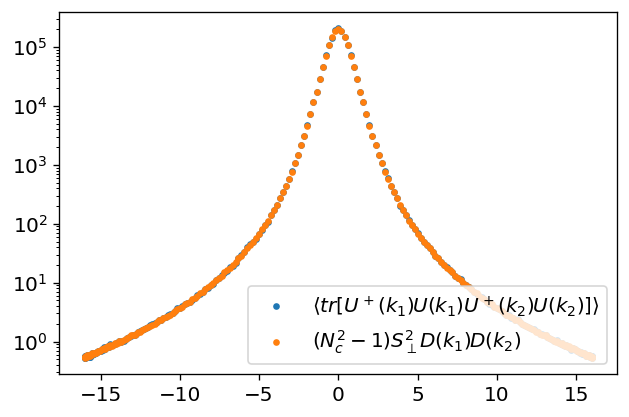

In [224]:
from random import uniform 
k2x = uniform(-1/delta, 1/delta)
k2y = uniform(-1/delta, 1/delta)

i_k2 = int(N*np.arcsin(abs(k2x)/2.0*delta)/np.pi + 0.5)
j_k2 = int(N*np.arcsin(abs(k2y)/2.0*delta)/np.pi + 0.5)

if(k2x<0): 
    i_k2 = N-i_k2
    
if(k2y<0): 
    j_k2 = N-j_k2

print ("Input momentum:                      ",k2x,k2y)
print ("Approximate momentum on the lattice: ", 2*np.sin(np.pi/N * i_k2)/delta*np.sign(np.sin(2*np.pi/N * i_k2)), 2*np.sin(np.pi/N * j_k2)/delta*np.sign(np.sin(2*np.pi/N * j_k2)))

#print(k2x,k2y,i_k2,j_k2)

FourUCorrRe = [] 
D1 = [] 
D2 = [] 
FourUCorrIm = [] 
k = []

j_k1=0
for i_k1 in range(N):
    #for j_k1 in range(N):
        kx = 2*np.sin(np.pi/N * i_k1)/delta*np.sign(np.sin(2*np.pi/N * i_k1))
        ky = 2*np.sin(np.pi/N * j_k1)/delta*np.sign(np.sin(2*np.pi/N * j_k1)) 
        C  = 0.0
        d1 = 0.0
        d2 = 0.0 
        for m in range(M):
            d1 += np.trace(np.conjugate(np.transpose(U_fft[:,:,i_k1,j_k1,m]))@U_fft[:,:,i_k1,j_k1,m])/8/L**2
            d2 += np.trace(np.conjugate(np.transpose(U_fft[:,:,i_k2,j_k2,m]))@U_fft[:,:,i_k2,j_k2,m])/8/L**2 
            C += np.trace(np.conjugate(np.transpose(U_fft[:,:,i_k1,j_k1,m]))@U_fft[:,:,i_k1,j_k1,m]@np.conjugate(np.transpose(U_fft[:,:,i_k2,j_k2,m]))@U_fft[:,:,i_k2,j_k2,m]) 
        FourUCorrRe.append(np.real(C)/M)
        D1.append(np.real(d1)/M)
        D2.append(np.real(d2)/M)
        FourUCorrIm.append(np.imag(C)/M)
        k.append(kx)

plt.plot(k,FourUCorrRe,'.',label=r'$\langle tr [ U^+(k_1) U(k_1)  U^+(k_2) U(k_2) ] \rangle $')
plt.plot(k,8*L**4*np.array(D1)*np.array(D2),'.',label=r'$(N_c^2-1) S^2_\perp D(k_1) D(k_2)$')
plt.yscale('log')
plt.legend(loc=4)


Input momentum:                       1.1605248774166785 0
Approximate momentum on the lattice:  1.1770330175946788 0.0
Input momentum:                       -2.3182396623474038 0
Approximate momentum on the lattice:  -2.347687591285789 0.0
-1.1577147849307252


(-5.0, 5.0)

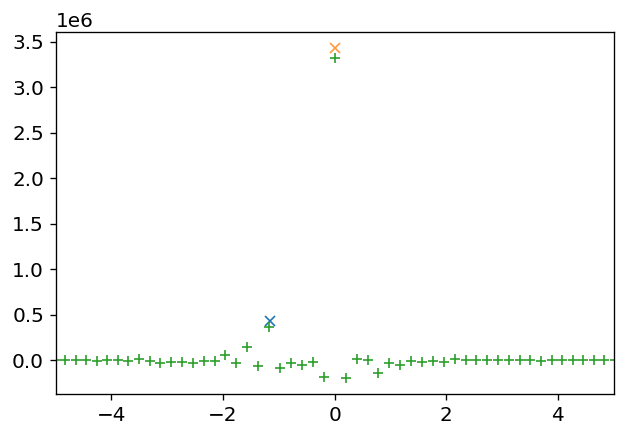

In [230]:
from random import uniform 

k1x = uniform(-1/delta, 1/delta)
k1y = uniform(-1/delta, 1/delta)

k1y = 0

i_k1 = int(N*np.arcsin(abs(k1x)/2.0*delta)/np.pi + 0.5)
j_k1 = int(N*np.arcsin(abs(k1y)/2.0*delta)/np.pi + 0.5)

k2x = uniform(-1/delta, 1/delta)
k2y = uniform(-1/delta, 1/delta)

k2y = 0 

i_k2 = int(N*np.arcsin(abs(k2x)/2.0*delta)/np.pi + 0.5)
j_k2 = int(N*np.arcsin(abs(k2y)/2.0*delta)/np.pi + 0.5)


if(k1x<0): 
    i_k1 = N-i_k1
    
if(k1y<0): 
    j_k1 = N-j_k1

if(k2x<0): 
    i_k2 = N-i_k2
    
if(k2y<0): 
    j_k2 = N-j_k2

print ("Input momentum:                      ",k1x,k1y)
print ("Approximate momentum on the lattice: ", 2*np.sin(np.pi/N * i_k1)/delta*np.sign(np.sin(2*np.pi/N * i_k1)), 2*np.sin(np.pi/N * j_k1)/delta*np.sign(np.sin(2*np.pi/N * j_k1)))
    
    
print ("Input momentum:                      ",k2x,k2y)
print ("Approximate momentum on the lattice: ", 2*np.sin(np.pi/N * i_k2)/delta*np.sign(np.sin(2*np.pi/N * i_k2)), 2*np.sin(np.pi/N * j_k2)/delta*np.sign(np.sin(2*np.pi/N * j_k2)))


print(k1x+k2x)
#print(k2x,k2y,i_k2,j_k2)

FourUCorrRe = [] 
D1 = [] 
D2 = [] 
FourUCorrIm = [] 
k = []

#j_k1=0
for i_p1 in range(N):
    #for j_k1 in range(N):
        px = 2*np.sin(np.pi/N * i_p1)/delta*np.sign(np.sin(2*np.pi/N * i_p1))
        
        C  = 0.0
        d1 = 0.0
        d2 = 0.0 
        for m in range(M):
            d1 += np.trace(np.conjugate(np.transpose(U_fft[:,:,i_k1,j_k1,m]))@U_fft[:,:,i_k1,j_k1,m])/8/L**2
            d2 += np.trace(np.conjugate(np.transpose(U_fft[:,:,i_k2,j_k2,m]))@U_fft[:,:,i_k2,j_k2,m])/8/L**2 
            C += np.trace(np.conjugate(np.transpose(U_fft[:,:,(i_k1-i_p1)%N,j_k1,m]))@U_fft[:,:,i_k1,j_k1,m]@np.conjugate(np.transpose(U_fft[:,:,i_k2,j_k2,m]))@U_fft[:,:,(i_k2-i_p1)%N,j_k2,m]) 
        FourUCorrRe.append(np.real(C)/M)
        D1.append(np.real(d1)/M)
        D2.append(np.real(d2)/M)
        FourUCorrIm.append(np.imag(C)/M)
        k.append(px)

#plt.plot(k,8*L**4*np.array(D1)*np.array(D2),'-',label=r'$(N_c^2-1) S^2_\perp D(k_1) D(k_2)$',alpha=0.8)
#plt.plot(k,L**4*np.array(D1)*np.array(D2),'-',label=r'$(N_c^2-1) S^2_\perp D(k_1) D(k_2)$',alpha=0.8)

plt.plot([k1x+k2x],[(L**4*np.array(D1)*np.array(D2))[0]],'x')
plt.plot([0.0],[(8*L**4*np.array(D1)*np.array(D2))[4]],'x',label=r'$(N_c^2-1) S^2_\perp D(k_1) D(k_2)$',alpha=0.8)


plt.plot(k,FourUCorrRe,'+',label=r'$\langle tr [ U^+(k_1) U(k_1)  U^+(k_2) U(k_2) ] \rangle $')

plt.xlim(-max(abs(k1x+k2x)*1.2,5),max(abs(k1x+k2x)*1.2,5))

#plt.yscale('log')
#plt.legend(loc=1)


Input momentum:                       -3.095909055674614 0.31918275917183614
Approximate momentum on the lattice:  -3.1214451522580573 0.3926596563665966
Input momentum:                       -3.095909055674614 0.31918275917183614
Approximate momentum on the lattice:  -3.1214451522580573 0.3926596563665966
-6.191818111349228


(-10.0, 10.0)

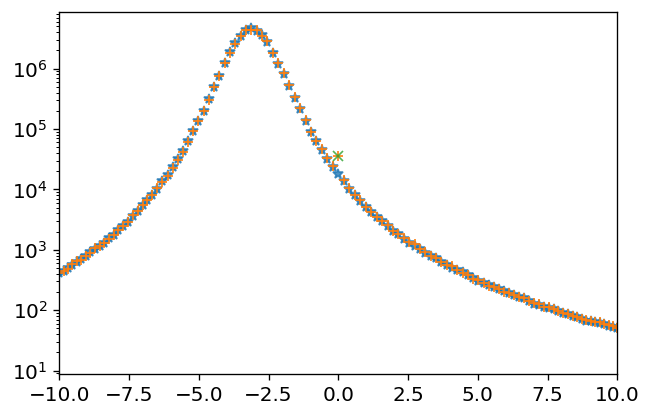

In [260]:
from random import uniform 

k1x = uniform(-1/delta, 1/delta)
k1y = uniform(-1/delta, 1/delta)


i_k1 = int(N*np.arcsin(abs(k1x)/2.0*delta)/np.pi + 0.5)
j_k1 = int(N*np.arcsin(abs(k1y)/2.0*delta)/np.pi + 0.5)

k2x = k1x
k2y = k1y

i_k2 = int(N*np.arcsin(abs(k2x)/2.0*delta)/np.pi + 0.5)
j_k2 = int(N*np.arcsin(abs(k2y)/2.0*delta)/np.pi + 0.5)


if(k1x<0): 
    i_k1 = N-i_k1
    
if(k1y<0): 
    j_k1 = N-j_k1

if(k2x<0): 
    i_k2 = N-i_k2
    
if(k2y<0): 
    j_k2 = N-j_k2

print ("Input momentum:                      ",k1x,k1y)
print ("Approximate momentum on the lattice: ", 2*np.sin(np.pi/N * i_k1)/delta*np.sign(np.sin(2*np.pi/N * i_k1)), 2*np.sin(np.pi/N * j_k1)/delta*np.sign(np.sin(2*np.pi/N * j_k1)))
    
    
print ("Input momentum:                      ",k2x,k2y)
print ("Approximate momentum on the lattice: ", 2*np.sin(np.pi/N * i_k2)/delta*np.sign(np.sin(2*np.pi/N * i_k2)), 2*np.sin(np.pi/N * j_k2)/delta*np.sign(np.sin(2*np.pi/N * j_k2)))


print(k1x+k2x)
#print(k2x,k2y,i_k2,j_k2)

FourUCorrRe = [] 
D1 = [] 
D2 = [] 
FourUCorrIm = [] 
k = []

#j_k1=0
for i_p1 in range(N):
    #for j_k1 in range(N):
        px = 2*np.sin(np.pi/N * i_p1)/delta*np.sign(np.sin(2*np.pi/N * i_p1))
        
        C  = 0.0
        d1 = 0.0
        d2 = 0.0 
        for m in range(M):
            d1 += np.trace(np.conjugate(np.transpose(U_fft[:,:,(i_k1-i_p1)%N,j_k1,m]))@U_fft[:,:,(i_k1-i_p1)%N,j_k1,m])/8/L**2
            d2 += np.trace(np.conjugate(np.transpose(U_fft[:,:,i_k2,j_k2,m]))@U_fft[:,:,i_k2,j_k2,m])/8/L**2 
            C += np.trace(np.conjugate(np.transpose(U_fft[:,:,(i_k1-i_p1)%N,j_k1,m]))@U_fft[:,:,i_k1,j_k1,m]@np.conjugate(np.transpose(U_fft[:,:,i_k2,j_k2,m]))@U_fft[:,:,(i_k2-i_p1)%N,j_k2,m]) 
        FourUCorrRe.append(np.real(C)/M)
        D1.append(np.real(d1)/M)
        D2.append(np.real(d2)/M)
        FourUCorrIm.append(np.imag(C)/M)
        k.append(px)

#plt.plot(k,8*L**4*np.array(D1)*np.array(D2),'-',label=r'$(N_c^2-1) S^2_\perp D(k_1) D(k_2)$',alpha=0.8)

plt.plot(k,8*L**4*np.array(D1)*np.array(D2),'*',label=r'$(N_c^2-1) S^2_\perp D(k_1) D(k_2)$',alpha=0.8)


plt.plot(k,FourUCorrRe,'+',label=r'$\langle tr [ U^+(k_1) U(k_1)  U^+(k_2) U(k_2) ] \rangle $')

plt.plot([0.0],[(2*8*L**4*np.array(D1)*np.array(D2))[0]],'x',label=r'$(N_c^2-1) S^2_\perp D(k_1) D(k_2)$',alpha=0.8)

plt.yscale('log')
plt.xlim((-10,10))
